In [1]:
from rockpool.devices.xylo.syns65302 import AFESim, AUDIO_SAMPLING_RATE, ChipButterworth, DivisiveNormalization, Raster
import librosa
import matplotlib.pyplot as plt
import numpy as np
from rockpool.timeseries import TSContinuous, TSEvent

from samna.xyloA3.configuration import InputInterfaceConfig


In [2]:
# import numpy as np
# import scipy.io.wavfile
# import matplotlib.pyplot as plt

# # Sampling parameters
# fs = int(AUDIO_SAMPLING_RATE)  # Sampling rate in Hz
# T = 2.0     # seconds
# t = np.linspace(0, T, int(T*fs), endpoint=False)  # time variable

# # create a frequency sweep from 20 to 20000 Hz

# start_freq = 20.0  # in Hz
# end_freq = 20000  # in Hz
# freq_sweep = np.linspace(start_freq, end_freq, int(T*fs), endpoint=False)
# freq_sweep = np.concatenate((freq_sweep, freq_sweep[::-1]))
# phi_inst = 2 * np.pi * np.cumsum(freq_sweep) * (1/fs)
# signal = np.sin(phi_inst)

# # ensure that highest values are in 16-bit range
# audio = np.int16(signal/np.max(np.abs(signal)) * 32767)

# # save as wave file
# scipy.io.wavfile.write('freq_sweep.wav', fs, audio)


## Load the audio file

In [3]:
filename = 'freq_sweep.wav'
y, sr = librosa.load(filename, sr=None)  # sr=None preserves the original sampling rate

## Quantize the signal to 14 bits

In [4]:
scale = 1
num_bits = 14
q_signal = np.vectorize(lambda __data : int(scale * __data * (2 ** (num_bits - 1))), )(y)

## Apply filters

In [5]:
filter_bank = ChipButterworth()

In [6]:
filtered, _, _ = filter_bank(q_signal)

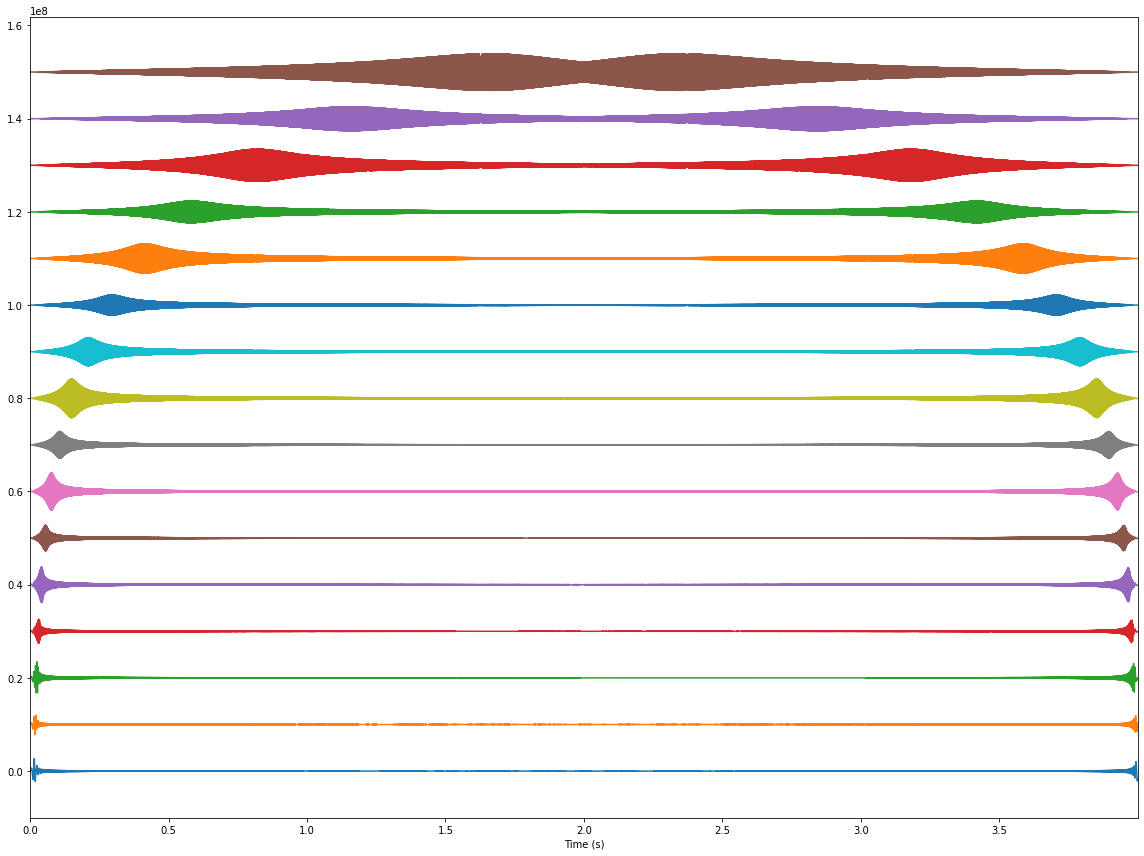

In [7]:
plt.figure(figsize=(16, 12))
TSContinuous.from_clocked(filtered, dt=1/sr).plot(stagger=1e7)
plt.tight_layout()
plt.show()

## Apply Divisive Normalization

In [8]:
divisive_norm = DivisiveNormalization(spike_rate_scale_bitshift1=6, spike_rate_scale_bitshift2=0)

In [9]:
import warnings
warnings.filterwarnings('ignore')
spike_out, _, _ = divisive_norm(filtered)

In [10]:
# Looks like it generates a lot of spikes for the high frequencies

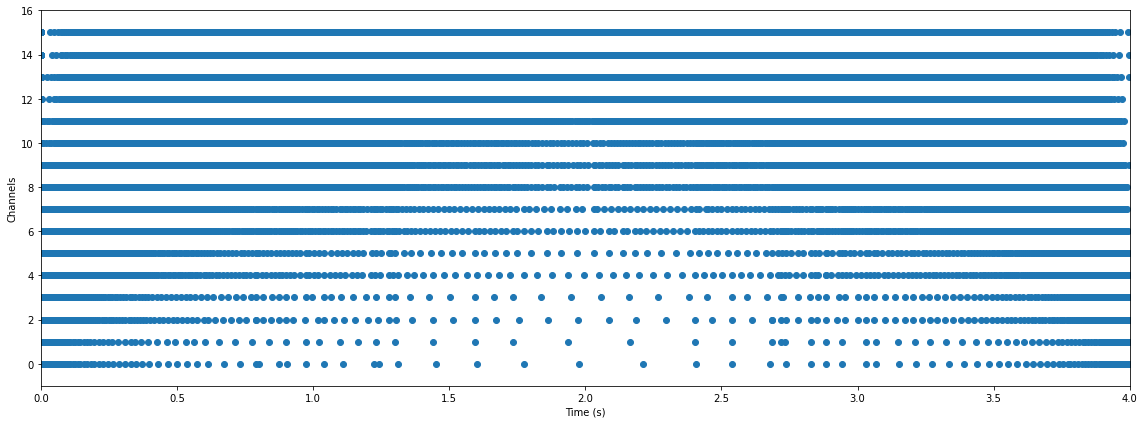

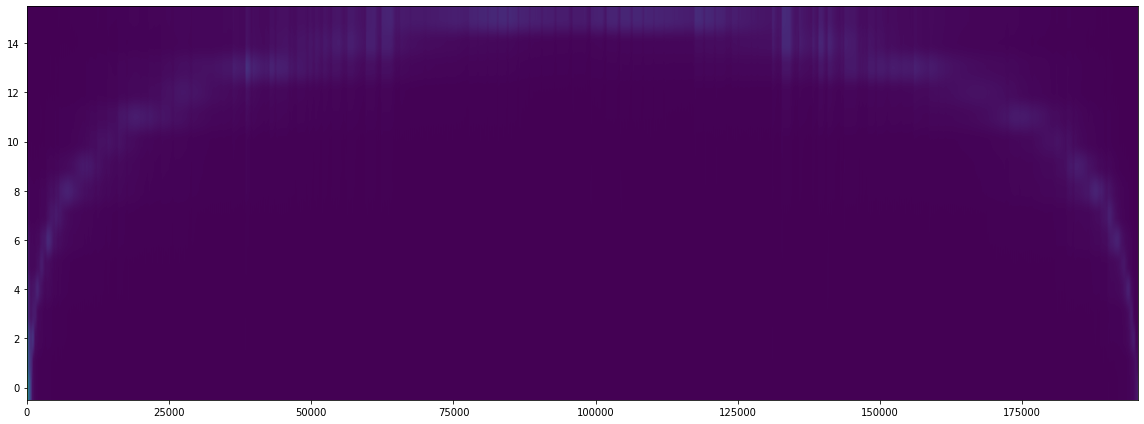

In [11]:
plt.figure(figsize=(16, 6))
TSEvent.from_raster(spike_out, dt=1/sr).plot()
plt.tight_layout()
plt.figure(figsize=(16, 6))
plt.imshow(spike_out.T, aspect = 'auto', origin = 'lower')
plt.tight_layout()

Channel 0  3487.714285714286
Channel 1  1808.4444444444443
Channel 2  775.047619047619
Channel 3  315.01935483870966
Channel 4  241.72277227722773
Channel 5  168.95501730103805
Channel 6  223.9816513761468
Channel 7  139.90830945558739
Channel 8  138.7159090909091
Channel 9  70.97093023255815
Channel 10  91.60975609756098
Channel 11  93.00571428571429
Channel 12  63.3307392996109
Channel 13  33.14867617107943
Channel 14  26.50814332247557
Channel 15  31.080840229153406


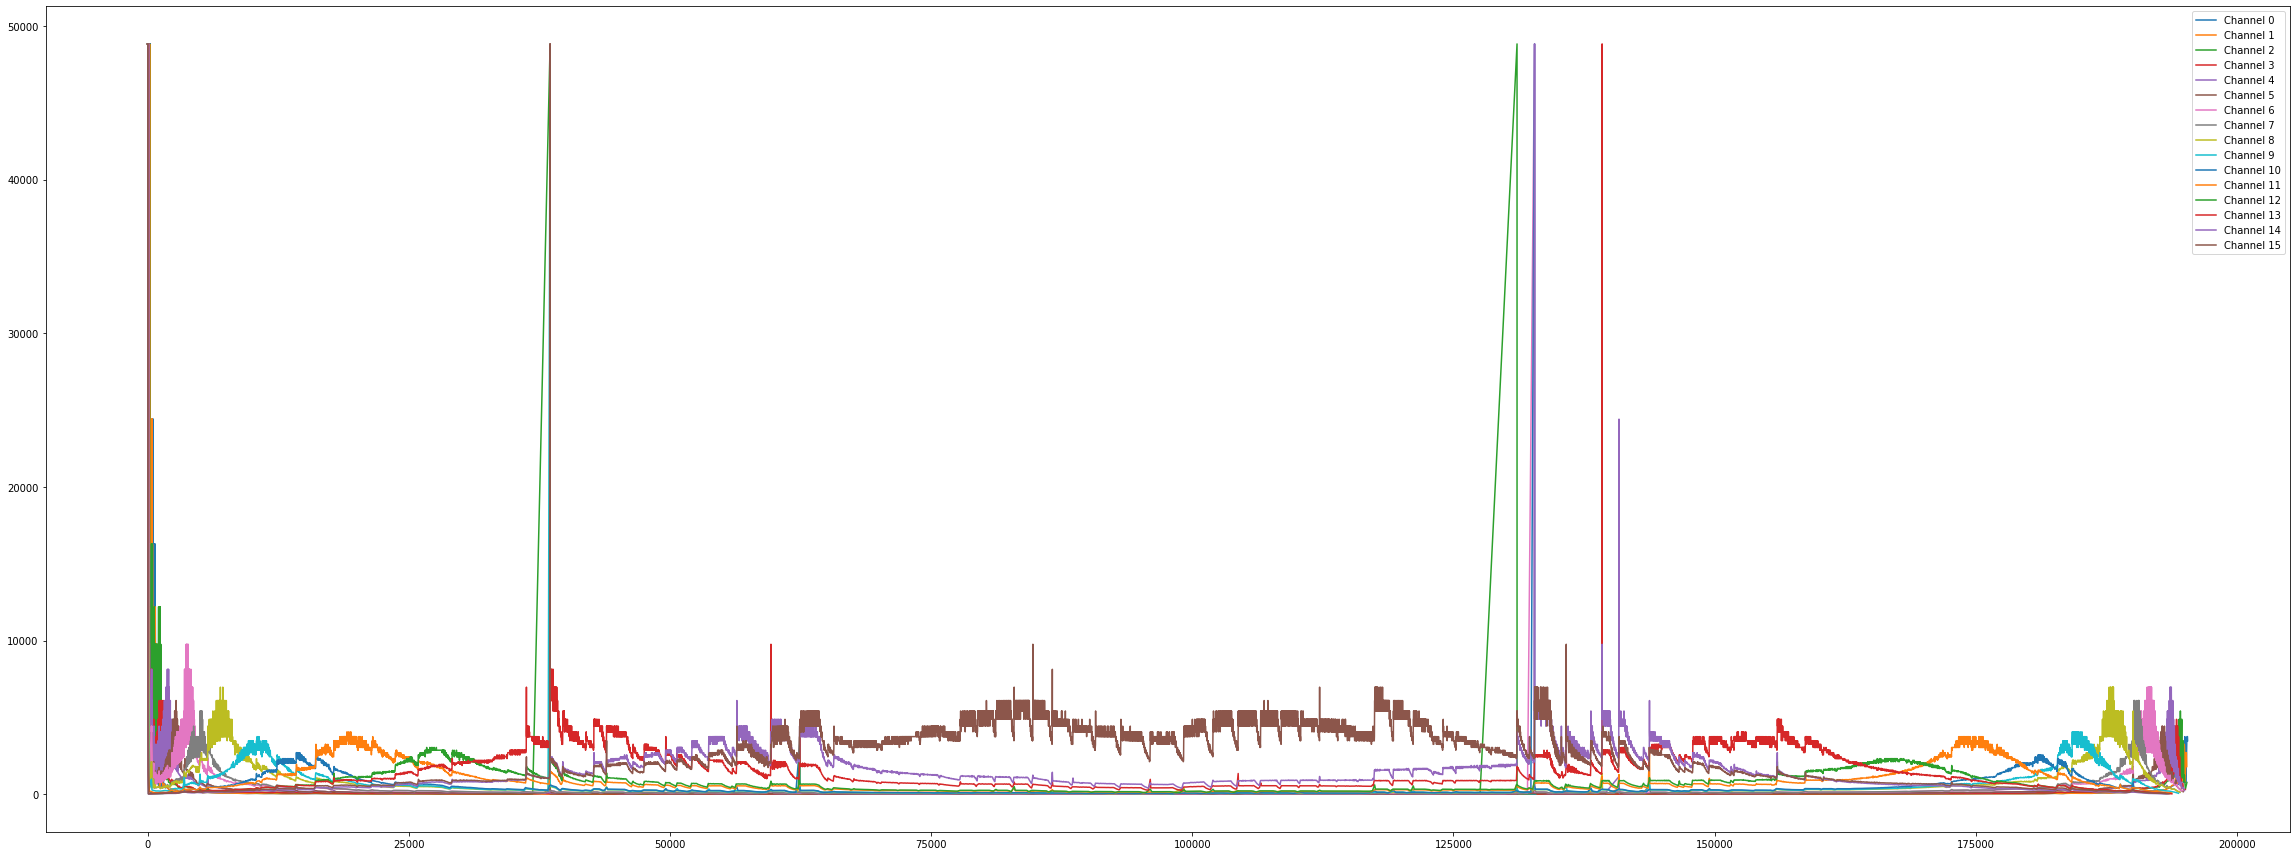

In [12]:

spike_out
plt.figure(figsize=(32, 12))

for i in range(16):
    spike_ch = spike_out[:,i]
    spike_times = np.where(spike_ch == 1)[0]
    spike_rate = sr/np.diff(spike_times)
    # print(spike_times[:-1].shape)
    # print(spike_rate.shape)
    # break
    plt.plot(spike_times[:-1], spike_rate, label=f'Channel {i}')
    print(f"Channel {i} ", spike_rate[-1])

plt.legend()
plt.tight_layout()
# spike_rate.T[-1]
# spike_times
# 1/np.diff(spike_times)

In [13]:
spike_out

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [14]:
raster = Raster(shape=(16,16))

In [15]:
out, _, _ = raster(spike_out)

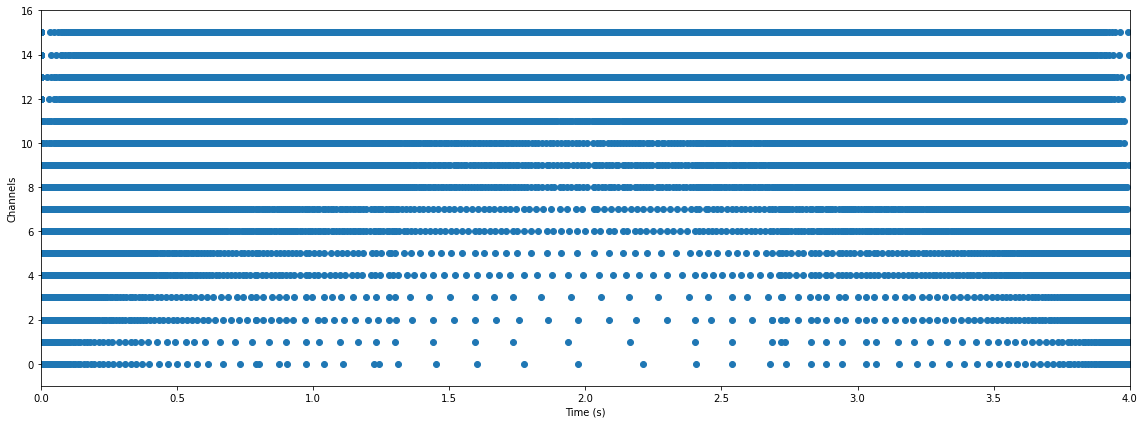

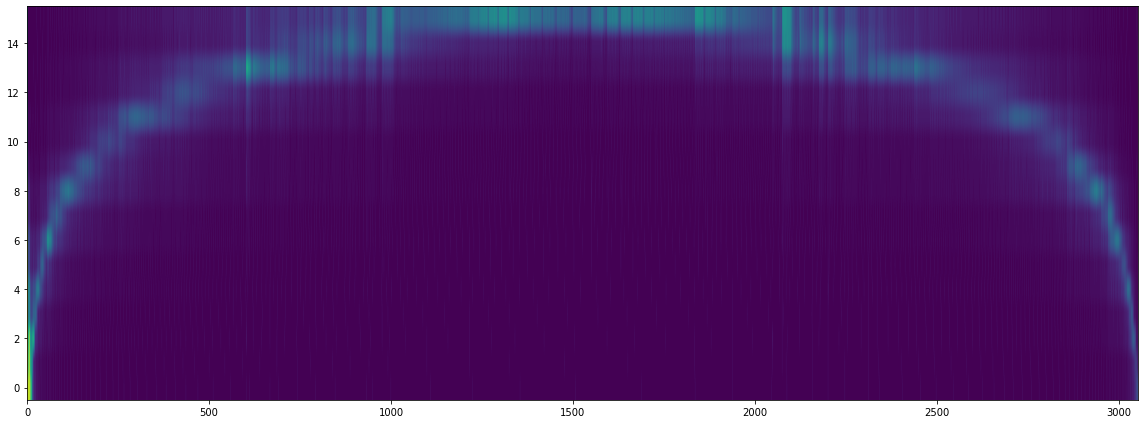

In [16]:
plt.figure(figsize=(16, 6))
TSEvent.from_raster(out, dt=64/sr).plot()
plt.tight_layout()
plt.figure(figsize=(16, 6))
plt.imshow(out.T, aspect = 'auto', origin = 'lower')
plt.tight_layout()

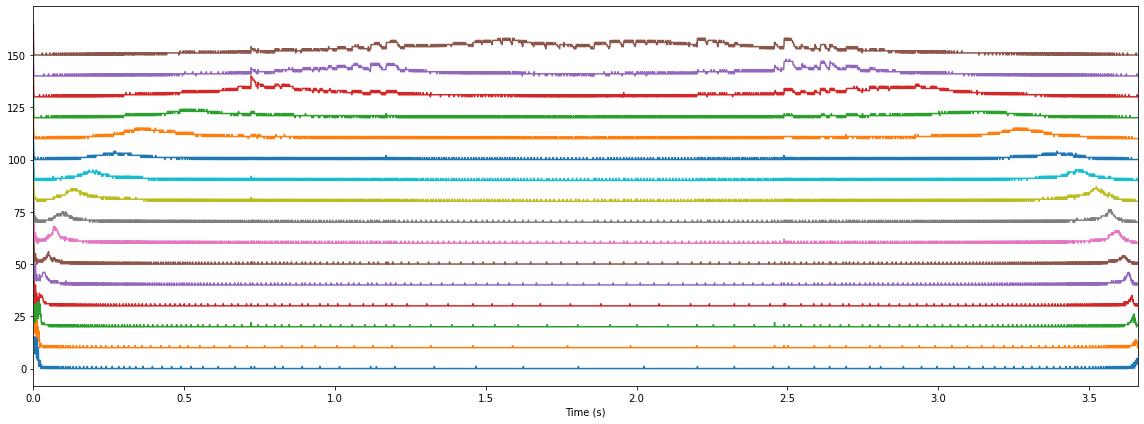

In [17]:
plt.figure(figsize=(16, 6))
TSContinuous.from_clocked(out,dt=1.2e-3).plot(stagger=10)
plt.tight_layout()
plt.show()

In [18]:
# afesim = AFESim()

In [19]:
# spike_out, _, _ = afesim(q_signal)

In [20]:
# plt.figure(figsize=(16, 6))
# TSEvent.from_raster(spike_out).plot()
# plt.tight_layout()